# **Diccionario de datos Chrun Telecom X**
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa

* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente

* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica

* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas

* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago

* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

## &#x1F477;Extracción

In [121]:
# Linea 1: cargar los datos
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')
# Mostrar información del DataFrame
df.info()
# Mostrar las primeras filas del DataFrame
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 	&#x1F6E0;Transformación

In [122]:
#Explorar el DataFrame y normalizar las columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

#Concatenar el DataFrame original con los nuevos DataFrames
df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                customer_df,
                phone_df,
                internet_df,
                account_df], axis=1)

#Mostrar el DataFrame resultante
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [123]:
#revisar el DataFrame y estandardizar los tipos de datos
df.info()
#columnas string
colum_string = ['customerID','Churn','gender', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling',
                'PaymentMethod']
#columnas boolean
column_bool = ['SeniorCitizen']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [124]:
#Convertir las columnas de tipo string
df[colum_string] = df[colum_string].astype(str)

#Convertir las columnas de tipo booleano
df[column_bool] = df[column_bool].astype(bool)
#Convertir las columnas de tipo numérico
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
#Reemplazar los valores NaN en la columna 'Charges.Total' con 0
df['Charges.Total'] = df['Charges.Total'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [125]:
#Buscar valores nulos
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [126]:
#Buscar valores únicos
df.nunique()

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6531
dtype: int64

In [127]:
# Mostrar los valores únicos de las columnas de tipo string
for column in colum_string:
    print({column})
    print(df[column].unique())
    print("\n")

{'customerID'}
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


{'Churn'}
['No' 'Yes' '']


{'gender'}
['Female' 'Male']


{'Partner'}
['Yes' 'No']


{'Dependents'}
['Yes' 'No']


{'PhoneService'}
['Yes' 'No']


{'MultipleLines'}
['No' 'Yes' 'No phone service']


{'InternetService'}
['DSL' 'Fiber optic' 'No']


{'OnlineSecurity'}
['No' 'Yes' 'No internet service']


{'OnlineBackup'}
['Yes' 'No' 'No internet service']


{'DeviceProtection'}
['No' 'Yes' 'No internet service']


{'TechSupport'}
['Yes' 'No' 'No internet service']


{'StreamingTV'}
['Yes' 'No' 'No internet service']


{'StreamingMovies'}
['No' 'Yes' 'No internet service']


{'Contract'}
['One year' 'Month-to-month' 'Two year']


{'PaperlessBilling'}
['Yes' 'No']


{'PaymentMethod'}
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']




In [128]:
#valores repetidos en customerID
df['customerID'].duplicated().sum()

np.int64(0)

In [129]:
#extraer de Churn los datos con valor ''  y eliminarlos del DataFrame

#Eliminar las filas donde Churn es NaN
registros_eliminados = df[df['Churn'] == '']
# Guardar los registros eliminados en un nuevo DataFrame
df = df[df['Churn'] != '']

#valores unicos de Churn para verificar que se eliminaron los registros
print(df['Churn'].unique())
registros_eliminados.head()

['No' 'Yes']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,False,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,False,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,False,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,True,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,True,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


In [130]:
# Verificar si PhoneService = No tiene MultiplesLines = Yes
df[(df['PhoneService'] == 'No') & (df['MultipleLines'] == 'Yes')]
# Verificar si IntenetService = No tiene 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies' = Yes
df[(df['InternetService'] == 'No') & (df['OnlineSecurity'] == 'Yes') & (df['OnlineBackup'] == 'Yes')
& (df['DeviceProtection'] == 'Yes') & (df['TechSupport'] == 'Yes')
& (df['StreamingTV'] == 'Yes') & (df['StreamingMovies'] == 'Yes')]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [131]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', -1)
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', -1)
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', -1)
df['TechSupport'] = df['TechSupport'].replace('No internet service', -1)
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', -1)
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', -1)
#Multiples lineas
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', -1)


In [132]:
# Colocar la columna InternetService No en No internet service
df['InternetService'] = df['InternetService'].replace('No', 'No internet service')


In [133]:
# Iterar sobre columnas para reemplazar Yes y No por 0 y 1
for column in colum_string:
    df[column] = df[column].replace({'Yes': 1, 'No': 0})

/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/3791752214.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'Yes': 1, 'No': 0})


In [134]:
#Agregar la columna nueva 'Charges.Diary' al DataFrame
df['Charges.Diary'] = (df['Charges.Monthly'] / 30).round(2)

In [135]:
#Cambiar el nombre de las columnas para español
# Definir un diccionario con los nuevos nombres de las columnas
new_column_names = {
    'customerID': 'ID Cliente',
    'Churn': 'Abandono',
    'gender': 'Género',
    'SeniorCitizen': 'Mayor de 65 años',
    'Partner': 'Tiene Pareja',
    'Dependents': 'Tiene Dependientes',
    'tenure': 'Duración del Contrato (meses)',
    'PhoneService': 'Servicio Telefónico',
    'MultipleLines': 'Múltiples Líneas',
    'InternetService': 'Servicio de Internet',
    'OnlineSecurity': 'Seguridad en Línea',
    'OnlineBackup': 'Respaldo en Línea',
    'DeviceProtection': 'Protección del Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'StreamingTV': 'TV por Cable',
    'StreamingMovies': 'Streaming de Películas',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Facturación Sin Papel',
    'PaymentMethod': 'Método de Pago',
    'Charges.Monthly': 'Costo Mensual',
    'Charges.Total': 'Costo Total',
    'Charges.Diary': 'Costo Diario'
}

# Renombramos las columnas
df.rename(columns=new_column_names, inplace=True)

In [136]:
# Diccionarios de entrada y reemplazo
replacement_dict = {
    'Género': {'Female': 'F', 'Male': 'M'},
    'Servicio de Internet': {'Fiber optic': 'Fibra Óptica'},
    'Tipo de Contrato':{'One year': 'Anual' ,'Month-to-month': 'Mensual' ,'Two year': 'Bianual'},
    'Método de Pago':{'Mailed check':'Cheque por Correo', 'Electronic check':'Cheque electrónico' ,'Credit card (automatic)':'Tarjeta de crédito (automático)','Bank transfer (automatic)': 'Transferencia bancaria (automático)'}
}

# Reemplazar datos en el DataFrame usando los diccionarios
for column, replacements in replacement_dict.items():
    df[column] = df[column].replace(replacements)

df.head()

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,0,1,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80


# Carga y analisis

In [137]:
#Analisis descriptivo
df.describe(include='all')

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario
count,7043,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,...,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,0002-ORFBO,NaN,M,False,NaN,NaN,NaN,NaN,NaN,Fibra Óptica,...,NaN,NaN,NaN,NaN,Mensual,NaN,Cheque electrónico,NaN,NaN,NaN
freq,1,NaN,3555,5901,NaN,NaN,NaN,NaN,NaN,3096,...,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265370,NaN,NaN,0.483033,0.299588,32.371149,0.903166,0.325004,NaN,...,0.127219,0.073548,0.167684,0.171234,NaN,0.592219,NaN,64.761692,2279.734304,2.158675
std,NaN,0.441561,NaN,NaN,0.499748,0.458110,24.559481,0.295752,0.642730,NaN,...,0.737868,0.708201,0.756958,0.758507,NaN,0.491457,NaN,30.090047,2266.794470,1.003088
min,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.000000,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,NaN,0.000000,NaN,18.250000,0.000000,0.610000
25%,NaN,0.000000,NaN,NaN,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.500000,398.550000,1.180000
50%,NaN,0.000000,NaN,NaN,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.350000,1394.550000,2.340000
75%,NaN,1.000000,NaN,NaN,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.850000,3786.600000,2.990000


In [138]:
df[['Servicio Telefónico','Múltiples Líneas', 'Seguridad en Línea',
     'Respaldo en Línea','Protección del Dispositivo','Soporte Técnico','TV por Cable','Streaming de Películas']].describe()

,Servicio Telefónico,Múltiples Líneas,Seguridad en Línea,Respaldo en Línea,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.903166,0.325004,0.069999,0.128212,0.127219,0.073548,0.167684,0.171234
std,0.295752,0.642730,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Analisis Descriptivo
### Tasa de abandono
La tasa de abandono promedio es del 26.54%. Esto indica que aproximadamente un cuarto de los clientes deja el servicio, lo cual es una señal de alerta para la empresa.
### Demografía del cliente:
* Género: La mayoría son hombres (51.69%).
* Mayor de 65 años: Solo el 48.31% de los clientes son mayores de 65 años, lo que sugiere que la mayoría son más jóvenes.
* Tiene Pareja: El 48.30%  tienen pareja.
* Tiene Dependientes: El 29.96% tienen dependientes.

### Duración del contrato:
Duración promedio 32.37 meses, con una desviación estándar de 24.56 meses.

### Servicios:

* Servicio de Internet más frecuente: Fibra Óptica 44% aproximadamente
* Servicio telefónico: El 90.32% tienen servicio telefónico.
* Múltiples líneas: El 42.18% tienen múltiples líneas.
* Seguridad en línea: El 28.67 % tiene seguridad en línea
* Respaldo en Linea: El 34,49% tiene respaldo en línea
* Protección del dispositivo: El 34.39% tienen protección del dispositivo.
* Soporte técnico: El 29.02% tienen soporte técnico.
* TV por cable: El 38.44% tienen TV por cable.
* Streaming de películas: El 38.79% tienen streaming de películas.

### Tipo de contrato y facturación:
* Tipo de Contrato: La mayoría son mensuales (59.22%).
* Facturación Sin Papel: El 59.22% prefieren la facturación sin papel.
* Método de Pago: El 23.65% prefieren el cheque electrónico.

### Costos:
* Costo mensual promedio de $64.76.

* Costo total promedio es de $2,279.73.

* Costo diario promedio es de $2.16.

### Conclusión

* Retención de clientes: La alta tasa de abandono (26.54%) es una preocupación significativa. La empresa debe investigar las razones detrás de este abandono y desarrollar estrategias para mejorar la retención de clientes, como ofrecer mejores servicios al cliente, promociones de fidelización, o mejorar la calidad del servicio.
* Demografía del cliente: La mayoría de los clientes son hombres y no mayores de 65 años. Esto sugiere que la empresa debe enfocarse en segmentos de mercado más jóvenes y masculinos para sus campañas de marketing y desarrollo de productos.
* Servicios: La alta adopción de servicios base como el servicio telefónico y el servicio de internet indica que estos son servicios clave. Sin embargo, la baja adopción de **servicios adicionales** como la protección del dispositivo y el soporte técnico sugiere una oportunidad para aumentar los ingresos mediante la promoción de estos servicios.
* Duración del Contrato: La variabilidad en la duración del contrato sugiere que la empresa debe trabajar en la estandarización y la mejora de la experiencia del cliente para asegurar contratos más largos y estables.
* Costos: Los costos mensuales y totales son relativamente bajos, lo que puede ser una ventaja competitiva. Sin embargo, la empresa debe asegurarse de que estos costos sean sostenibles y que no estén afectando la calidad del servicio.


## Distribución de la evación

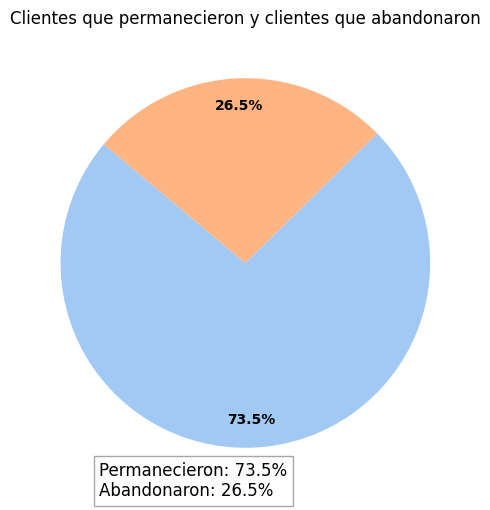

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

abandono_counts = df['Abandono'].value_counts()
colors = sns.color_palette("pastel", 2)

# Gráfico de pastel
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(abandono_counts, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
# Personalizar el gráfico
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

#decripcion de las categorias
plt.gcf().text(
    0.33, 0.10,
    'Permanecieron: {:.1f}%\nAbandonaron: {:.1f}%'.format(
        abandono_counts[0] / abandono_counts.sum() * 100,
        abandono_counts[1] / abandono_counts.sum() * 100
    ),
    fontsize=12,
    ha='left',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

plt.title('Clientes que permanecieron y clientes que abandonaron')
plt.ylabel('')
plt.show()

### Distribución de abandono por rangos de contratación

/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/4072246895.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_rango = df.groupby('Rango de Contrato')['Abandono'].mean().reset_index()
/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/4072246895.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rango de Contrato', y='Abandono', data=abandono_por_rango, palette='viridis')


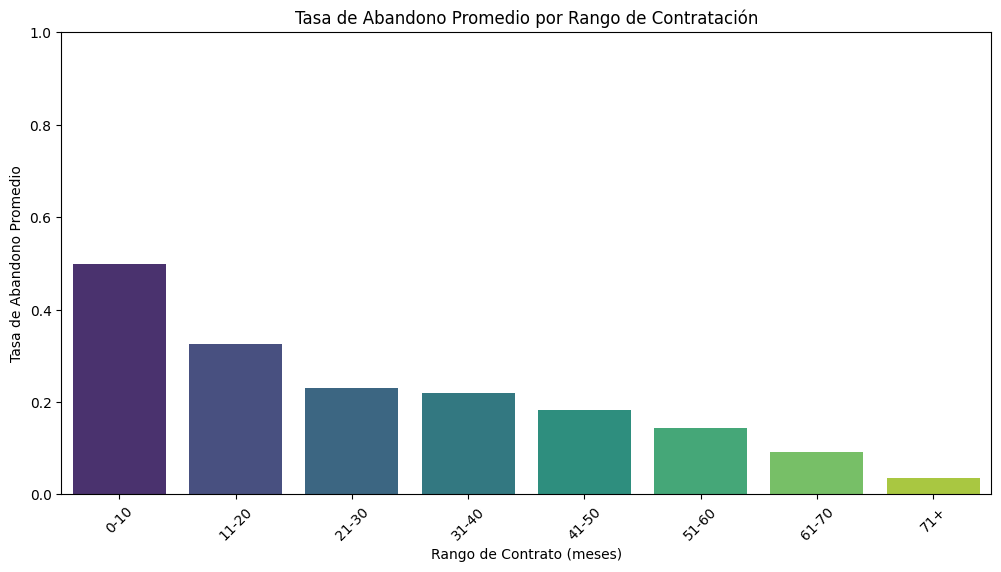

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los intervalos de meses
bins = [0, 10, 20, 30, 40, 50, 60, 70, df['Duración del Contrato (meses)'].max()+1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['Rango de Contrato'] = pd.cut(df['Duración del Contrato (meses)'], bins=bins, labels=labels, right=False)

# Calcular la tasa de abandono promedio por rango de contratación
abandono_por_rango = df.groupby('Rango de Contrato')['Abandono'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Rango de Contrato', y='Abandono', data=abandono_por_rango, palette='viridis')
plt.title('Tasa de Abandono Promedio por Rango de Contratación')
plt.xlabel('Rango de Contrato (meses)')
plt.ylabel('Tasa de Abandono Promedio')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [158]:
print(df.isnull().sum())

ID Cliente                           0
Abandono                             0
Género                               0
Mayor de 65 años                     0
Tiene Pareja                         0
Tiene Dependientes                   0
Duración del Contrato (meses)        0
Servicio Telefónico                  0
Múltiples Líneas                     0
Servicio de Internet                 0
Seguridad en Línea                   0
Respaldo en Línea                    0
Protección del Dispositivo           0
Soporte Técnico                      0
TV por Cable                         0
Streaming de Películas               0
Tipo de Contrato                     0
Facturación Sin Papel                0
Método de Pago                       0
Costo Mensual                        0
Costo Total                          0
Costo Diario                         0
Rango de Contrato                    0
Cantidad de Servicios Contratados    0
dtype: int64


### Tasa de abandono por tipo de contrato

/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/2925444116.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tipo de Contrato', y='Abandono', data=df, ci=None, palette='viridis')
/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/2925444116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Contrato', y='Abandono', data=df, ci=None, palette='viridis')


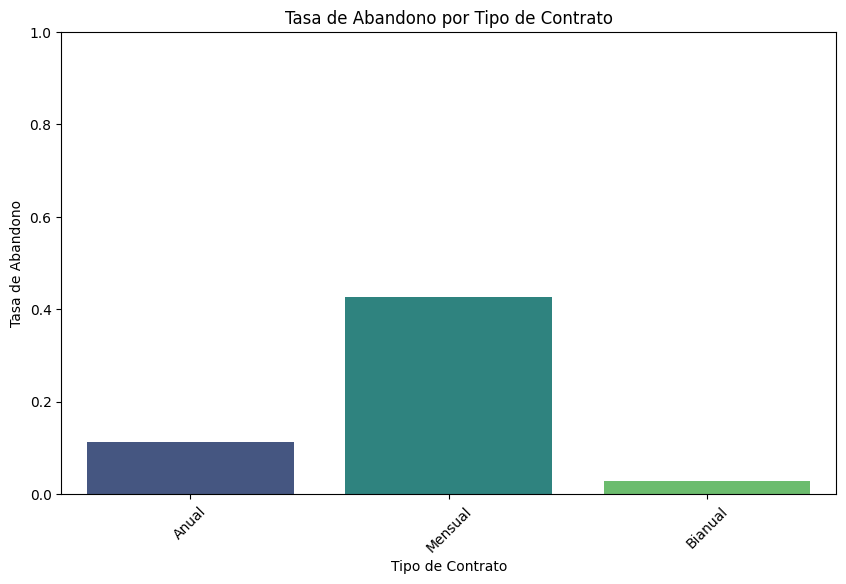

In [159]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Contrato', y='Abandono', data=df, ci=None, palette='viridis')
plt.title('Tasa de Abandono por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Abandono')
plt.ylim(0, 1)  # Ajustar los límites del eje y para mayor claridad
plt.xticks(rotation=45)
plt.show()

### Tasa de abandono segun el tipo de servicio de internet contratado

/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/1798102996.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Servicio de Internet', y='Abandono', data=abandono_por_servicio_internet, palette='viridis')


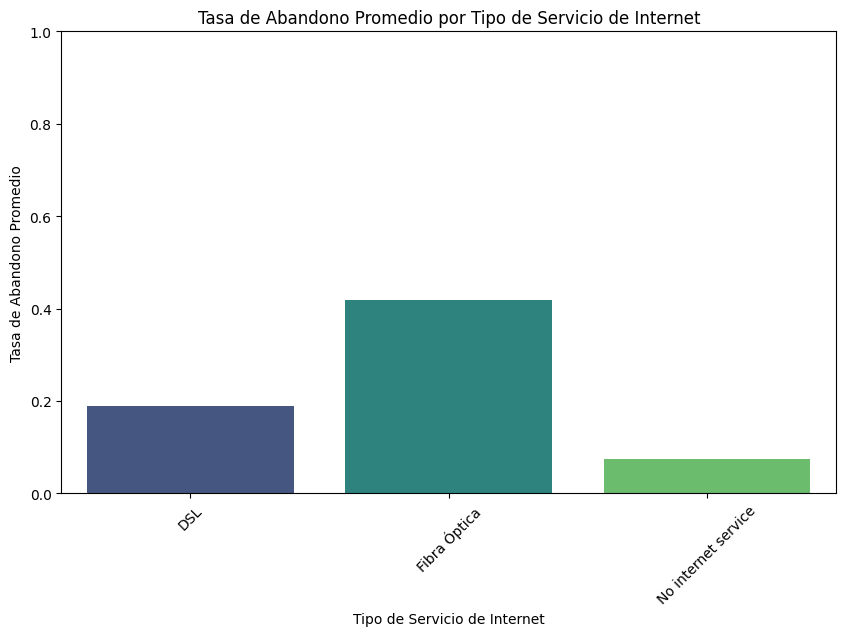

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular la tasa de abandono promedio por tipo de servicio de internet
abandono_por_servicio_internet = df.groupby('Servicio de Internet')['Abandono'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Servicio de Internet', y='Abandono', data=abandono_por_servicio_internet, palette='viridis')
plt.title('Tasa de Abandono Promedio por Tipo de Servicio de Internet')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Tasa de Abandono Promedio')
plt.ylim(0, 1)  # Ajustar los límites del eje y para mayor claridad
plt.xticks(rotation=45)
plt.show()

## Análisis de Correlación de Variables

Se analiza las relaciones entre las variables numéricas usando la matriz de correlación de Pearson.

### Coeficiente de Correlación de Pearson
El coeficiente de correlación de Pearson (r) varía entre -1 y 1:
* r = 1 indica una correlación positiva perfecta.
* r = -1 indica una correlación negativa perfecta.
* r = 0 indica que no hay correlación lineal.

In [144]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                               Abandono  Tiene Pareja  Tiene Dependientes  \
Abandono                       1.000000     -0.150448           -0.164221   
Tiene Pareja                  -0.150448      1.000000            0.452676   
Tiene Dependientes            -0.164221      0.452676            1.000000   
Duración del Contrato (meses) -0.352229      0.379697            0.159712   
Servicio Telefónico            0.011942      0.017706           -0.001762   
Múltiples Líneas               0.036310      0.117307           -0.019657   
Seguridad en Línea             0.023309      0.091303           -0.029721   
Respaldo en Línea              0.074205      0.090753           -0.062775   
Protección del Dispositivo     0.084654      0.098664           -0.069078   
Soporte Técnico                0.027037      0.076551           -0.040788   
TV por Cable                   0.164673      0.079785           -0.086739   
Streaming de Películas         0.163220      0.075098           -0.101475   

### Gráfico de la Matriz de Correlación

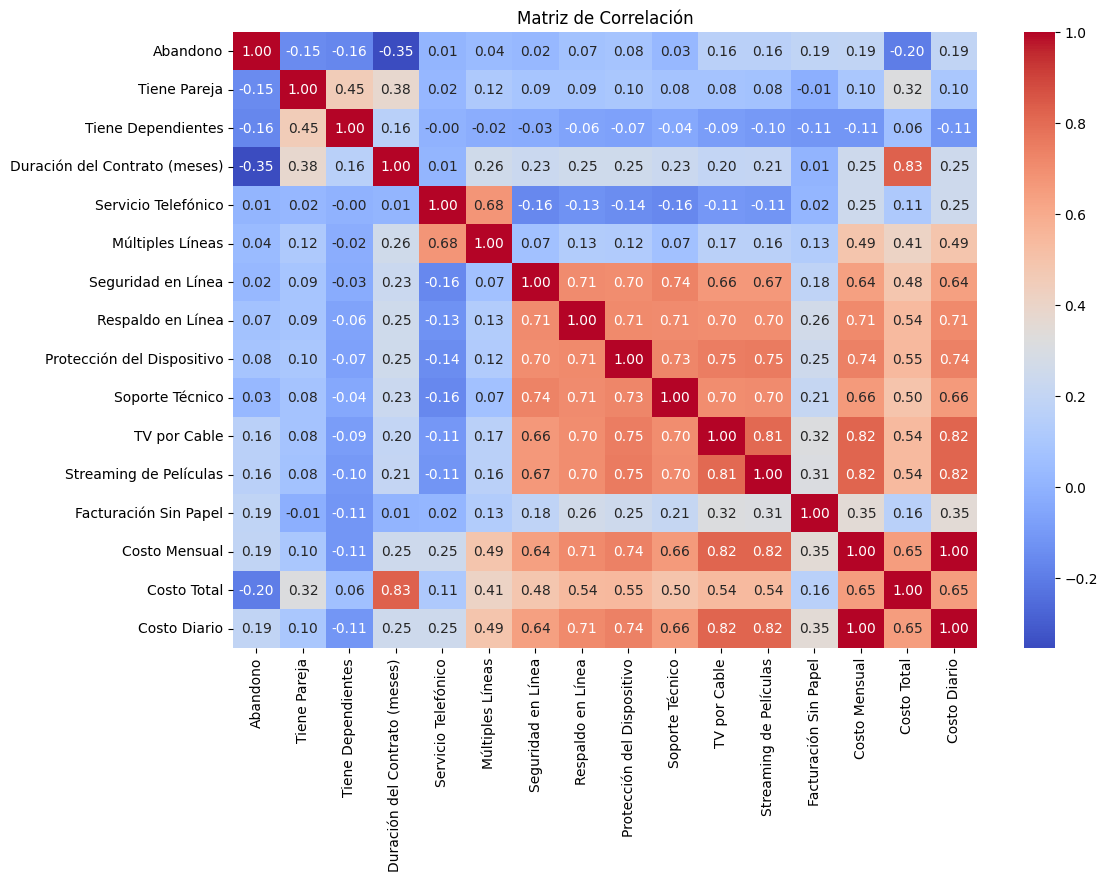

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### Comentarios sobre el mapa de calor de la matriz de correlación
1. La variable 'Abandono' (churn) muestra una correlación negativa moderada con la 'Duración del Contrato (meses)' (-0.35), lo que indica que los clientes con contratos más largos tienden a **abandonar menos**.
2. 'Abandono' también tiene correlaciones negativas con servicios adicionales como 'Seguridad en Línea', 'Soporte Técnico' y 'Protección del Dispositivo', sugiriendo que quienes contratan estos servicios adicionales tienden a permanecer más tiempo.
3. Existe una correlación positiva entre 'Abandono' y 'Facturación Sin Papel' (0.19) y 'Costo Mensual' (0.19), lo que podría indicar que quienes pagan más o prefieren facturación digital tienden a abandonar más.
4. Las variables de servicios adicionales (como 'TV por Cable', 'Streaming de Películas', etc.) están fuertemente correlacionadas entre sí, lo que sugiere que los clientes suelen contratar varios servicios adicionales juntos.
5. 'Costo Total' está altamente correlacionado con la 'Duración del Contrato', lo cual es lógico ya que a mayor tiempo de permanencia, mayor gasto acumulado.

En resumen, la retención de clientes parece estar asociada a la duración del contrato y la contratación de servicios adicionales. Se recomienda a la empresa incentivar contratos de mayor duración y la adopción de servicios complementarios para reducir la tasa de abandono.

### Histograma de costo total y duración del contrato

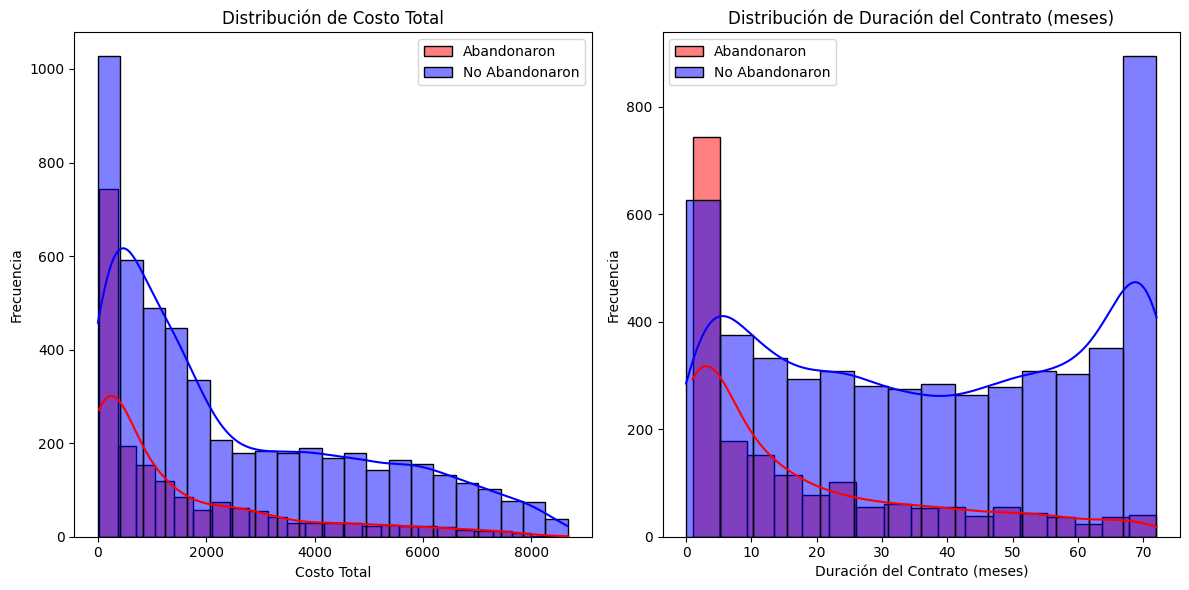

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos por abandono
abandonaron = df[df['Abandono'] == 1]
no_abandonaron = df[df['Abandono'] == 0]

# Histograma de Costo Total
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(abandonaron['Costo Total'], kde=True, color='red', label='Abandonaron')
sns.histplot(no_abandonaron['Costo Total'], kde=True, color='blue', label='No Abandonaron')
plt.title('Distribución de Costo Total')
plt.xlabel('Costo Total')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma de Duración del Contrato (meses)
plt.subplot(1, 2, 2)
sns.histplot(abandonaron['Duración del Contrato (meses)'], kde=True, color='red', label='Abandonaron')
sns.histplot(no_abandonaron['Duración del Contrato (meses)'], kde=True, color='blue', label='No Abandonaron')
plt.title('Distribución de Duración del Contrato (meses)')
plt.xlabel('Duración del Contrato (meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

### Boxplot de costo total y duración del contrato

/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/1884974067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Costo Total', data=df, palette='Set2')
/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/1884974067.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Duración del Contrato (meses)', data=df, palette='Set2')


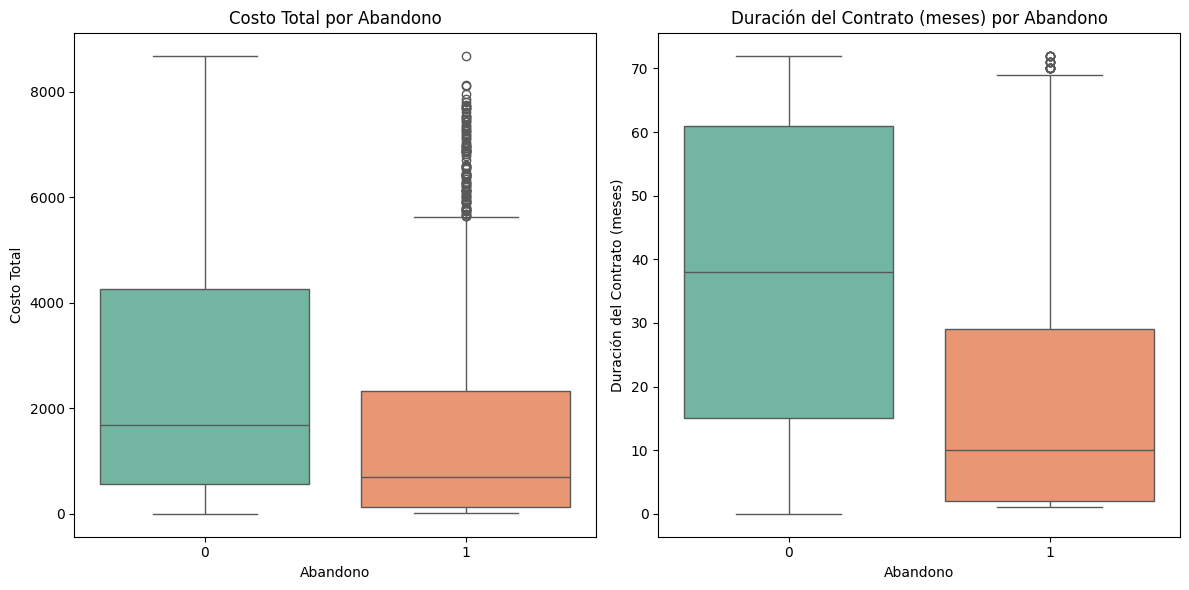

In [147]:
# Boxplot de Costo Total
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Abandono', y='Costo Total', data=df, palette='Set2')
plt.title('Costo Total por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Costo Total')

# Boxplot de Duración del Contrato (meses)
plt.subplot(1, 2, 2)
sns.boxplot(x='Abandono', y='Duración del Contrato (meses)', data=df, palette='Set2')
plt.title('Duración del Contrato (meses) por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Duración del Contrato (meses)')

plt.tight_layout()
plt.show()

In [148]:
from scipy.stats import ttest_ind

# Prueba de t para Costo Total
t_stat_costo_total, p_value_costo_total = ttest_ind(abandonaron['Costo Total'], no_abandonaron['Costo Total'])
print(f'Prueba de t para Costo Total: t-statistic = {t_stat_costo_total}, p-value = {p_value_costo_total}')

# Prueba de t para Duración del Contrato (meses)
t_stat_duracion, p_value_duracion = ttest_ind(abandonaron['Duración del Contrato (meses)'], no_abandonaron['Duración del Contrato (meses)'])
print(f'Prueba de t para Duración del Contrato (meses): t-statistic = {t_stat_duracion}, p-value = {p_value_duracion}')

Prueba de t para Costo Total: t-statistic = -16.978779727124426, p-value = 2.1272116132408192e-63
Prueba de t para Duración del Contrato (meses): t-statistic = -31.579550511353766, p-value = 7.99905796059022e-205


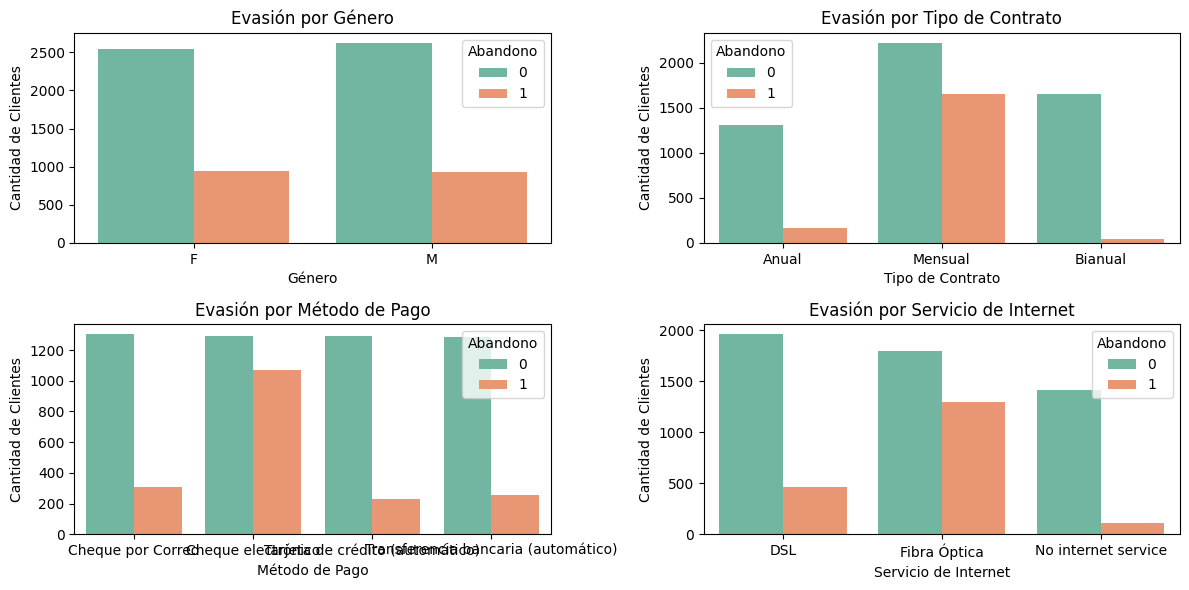

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para Género
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='Género', hue='Abandono', data=df, palette='Set2')
plt.title('Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')

# Gráfico de barras para Tipo de Contrato
plt.subplot(2, 2, 2)
sns.countplot(x='Tipo de Contrato', hue='Abandono', data=df, palette='Set2')
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')

# Gráfico de barras para Método de Pago
plt.subplot(2, 2, 3)
sns.countplot(x='Método de Pago', hue='Abandono', data=df, palette='Set2')
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')

# Gráfico de barras para Servicio de Internet
plt.subplot(2, 2, 4)
sns.countplot(x='Servicio de Internet', hue='Abandono', data=df, palette='Set2')
plt.title('Evasión por Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Cantidad de Clientes')

plt.tight_layout()
plt.show()

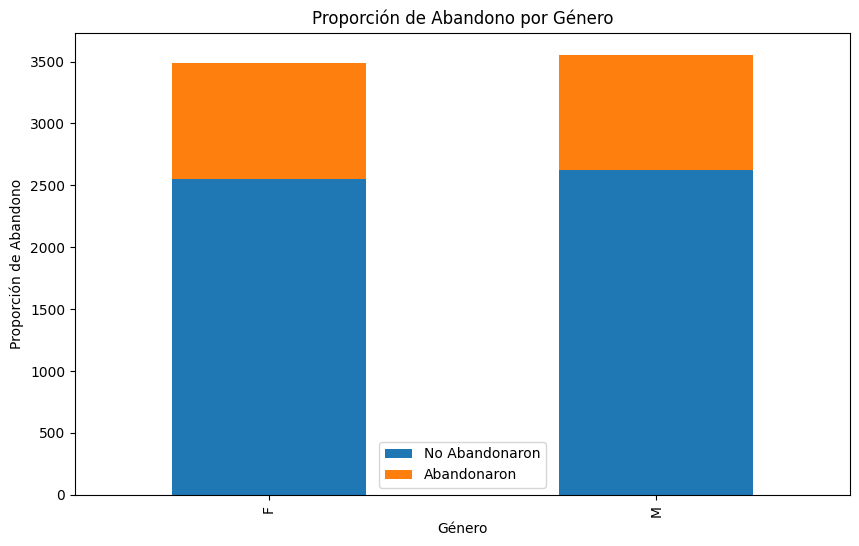

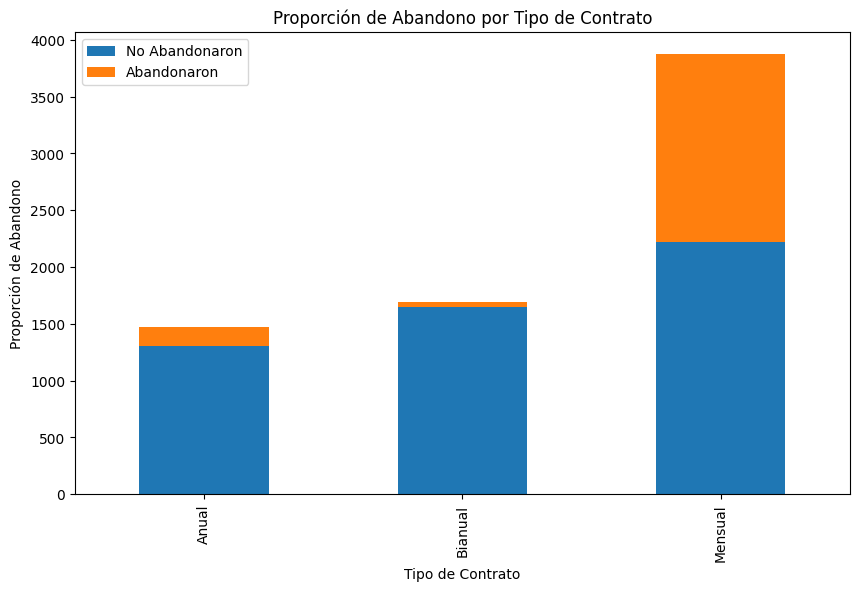

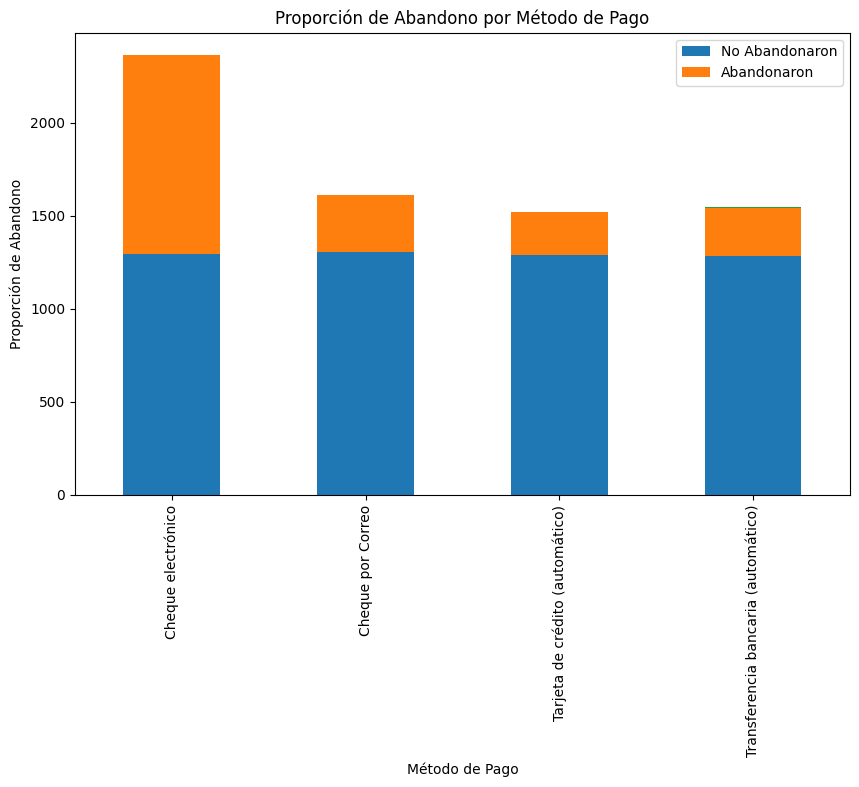

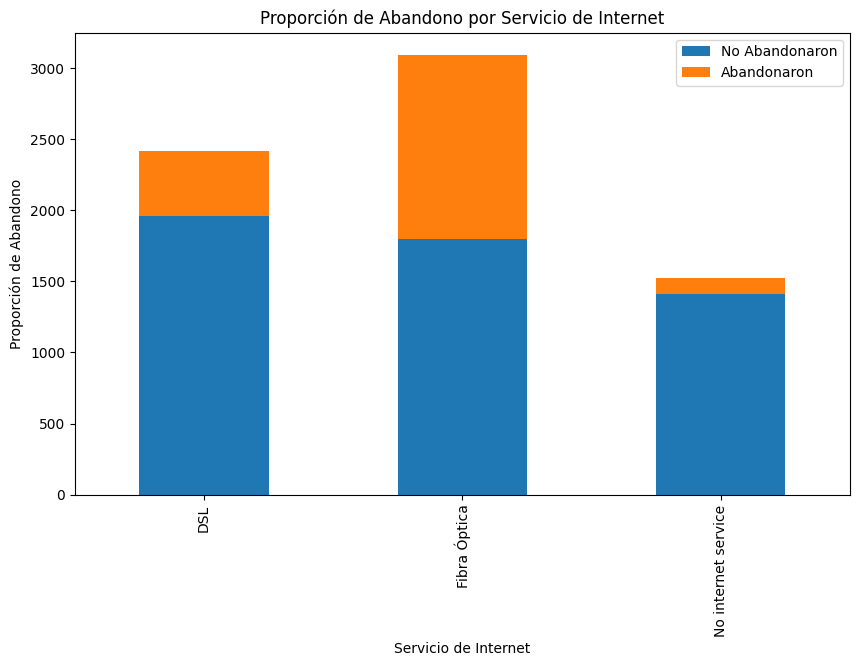

In [150]:
# Función para calcular proporciones
def plot_proportions(data, category, title):
    proportions = data.groupby([category, 'Abandono']).size().unstack().fillna(0)
    proportions['Proporción de Abandono'] = proportions[1] / (proportions[0] + proportions[1])
    proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel('Proporción de Abandono')
    plt.legend(['No Abandonaron', 'Abandonaron'])
    plt.show()

# Gráfico de proporciones para Género
plot_proportions(df, 'Género', 'Proporción de Abandono por Género')

# Gráfico de proporciones para Tipo de Contrato
plot_proportions(df, 'Tipo de Contrato', 'Proporción de Abandono por Tipo de Contrato')

# Gráfico de proporciones para Método de Pago
plot_proportions(df, 'Método de Pago', 'Proporción de Abandono por Método de Pago')

# Gráfico de proporciones para Servicio de Internet
plot_proportions(df, 'Servicio de Internet', 'Proporción de Abandono por Servicio de Internet')

In [151]:
# Crear la columna de cantidad de servicios adicionales, solo sumar cuando = 1

df['Cantidad de Servicios Contratados'] = (
    (df['Múltiples Líneas'] == 1).astype(int) +
    (df['Seguridad en Línea'] == 1).astype(int) +
    (df['Respaldo en Línea'] == 1).astype(int) +
    (df['Protección del Dispositivo'] == 1).astype(int) +
    (df['Soporte Técnico'] == 1).astype(int) +
    (df['TV por Cable'] == 1).astype(int) +
    (df['Streaming de Películas'] == 1).astype(int)
)

#solo mostrar algunas columnas
df[['ID Cliente', 'Abandono','Servicio Telefónico', 'Múltiples Líneas', 'Servicio de Internet', 'Seguridad en Línea', 'Respaldo en Línea', 'Protección del Dispositivo', 'Soporte Técnico', 'TV por Cable', 'Streaming de Películas', 'Cantidad de Servicios Contratados']].head(20)


,ID Cliente,Abandono,Servicio Telefónico,Múltiples Líneas,Servicio de Internet,Seguridad en Línea,Respaldo en Línea,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Cantidad de Servicios Contratados
0,0002-ORFBO,0,1,0,DSL,0,1,0,1,1,0,3
1,0003-MKNFE,0,1,1,DSL,0,0,0,0,0,1,2
2,0004-TLHLJ,1,1,0,Fibra Óptica,0,0,1,0,0,0,1
3,0011-IGKFF,1,1,0,Fibra Óptica,0,1,1,0,1,1,4
4,0013-EXCHZ,1,1,0,Fibra Óptica,0,0,0,1,1,0,2
5,0013-MHZWF,0,1,0,DSL,0,0,0,1,1,1,3
6,0013-SMEOE,0,1,0,Fibra Óptica,1,1,1,1,1,1,6
7,0014-BMAQU,0,1,1,Fibra Óptica,1,0,0,1,0,0,3
8,0015-UOCOJ,0,1,0,DSL,1,0,0,0,0,0,1
9,0016-QLJIS,0,1,1,DSL,1,1,1,1,1,1,7


/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/1600621308.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y='Cantidad de Servicios Contratados', data=df, palette='Set2')


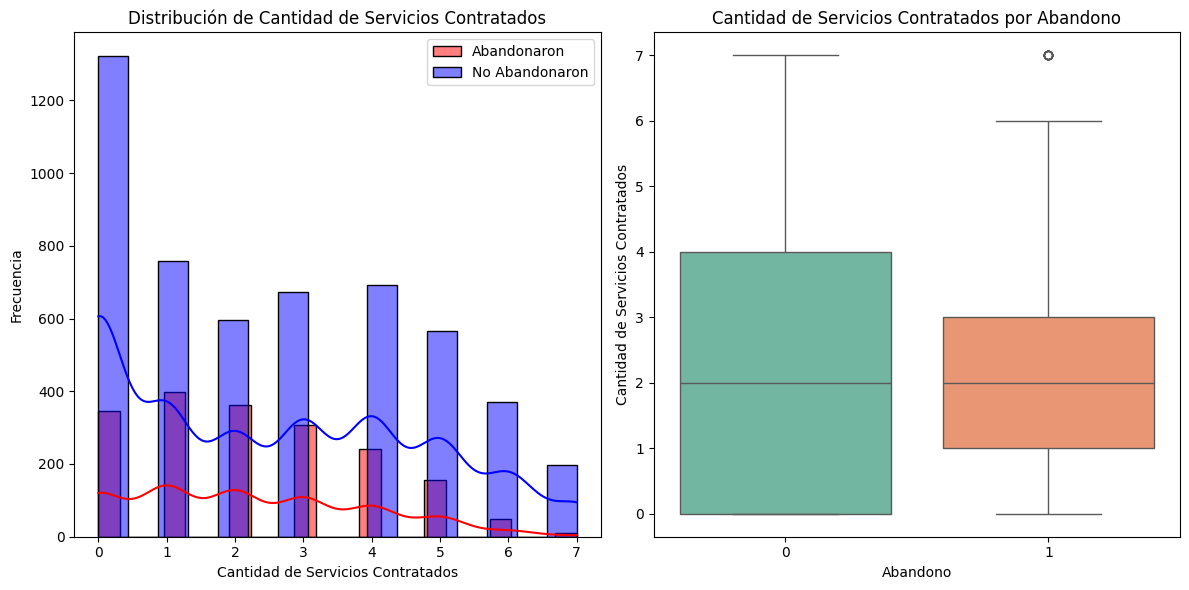

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos por abandono
abandonaron = df[df['Abandono'] == 1]
no_abandonaron = df[df['Abandono'] == 0]

# Histograma de Cantidad de Servicios Contratados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(abandonaron['Cantidad de Servicios Contratados'], kde=True, color='red', label='Abandonaron')
sns.histplot(no_abandonaron['Cantidad de Servicios Contratados'], kde=True, color='blue', label='No Abandonaron')
plt.title('Distribución de Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Frecuencia')
plt.legend()

# Boxplot de Cantidad de Servicios Contratados
plt.subplot(1, 2, 2)
sns.boxplot(x='Abandono', y='Cantidad de Servicios Contratados', data=df, palette='Set2')
plt.title('Cantidad de Servicios Contratados por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Cantidad de Servicios Contratados')

plt.tight_layout()
plt.show()

In [153]:
from scipy.stats import ttest_ind

# Prueba de t para Cantidad de Servicios Contratados
t_stat_servicios, p_value_servicios = ttest_ind(abandonaron['Cantidad de Servicios Contratados'], no_abandonaron['Cantidad de Servicios Contratados'])
print(f'Prueba de t para Cantidad de Servicios Contratados: t-statistic = {t_stat_servicios}, p-value = {p_value_servicios}')

Prueba de t para Cantidad de Servicios Contratados: t-statistic = -5.848709058313176, p-value = 5.175877455163082e-09


/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_21326/1291474850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Abandono', y='Cantidad de Servicios Contratados', data=df, palette='Set2')


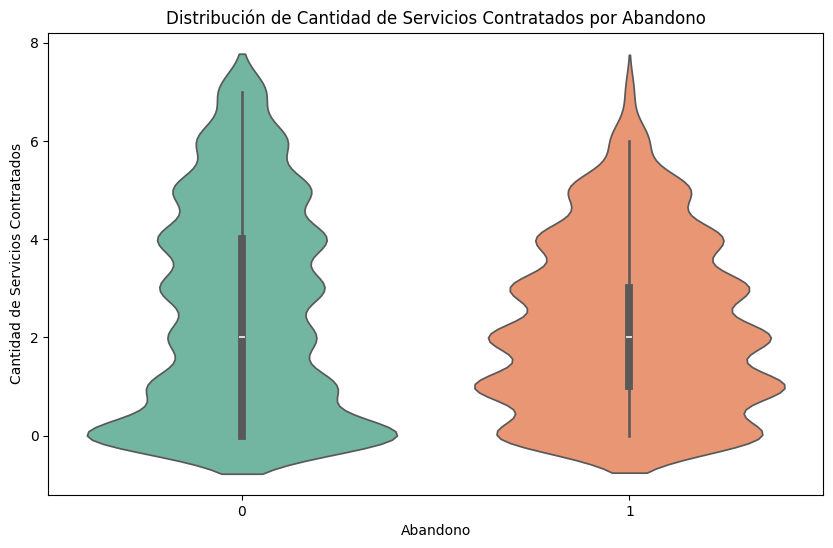

In [154]:
# Gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='Abandono', y='Cantidad de Servicios Contratados', data=df, palette='Set2')
plt.title('Distribución de Cantidad de Servicios Contratados por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Cantidad de Servicios Contratados')
plt.show()

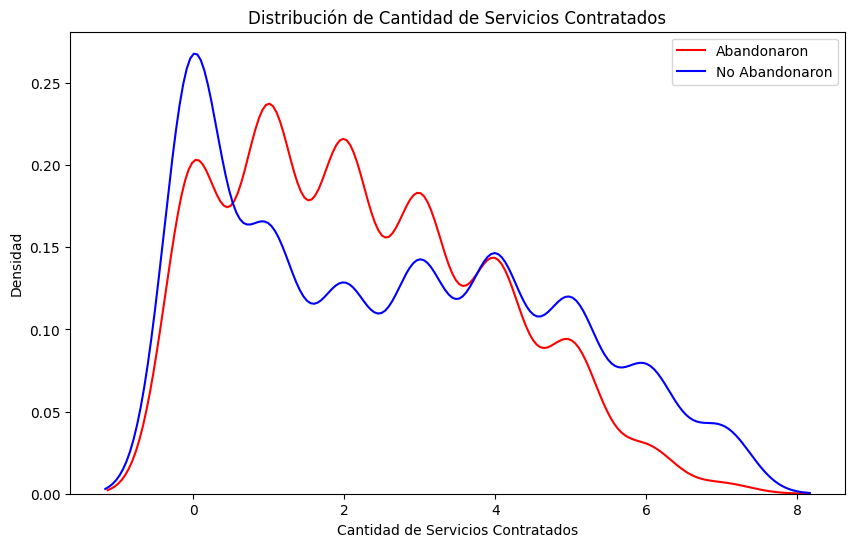

In [155]:
# Gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=abandonaron, x='Cantidad de Servicios Contratados', color='red', label='Abandonaron')
sns.kdeplot(data=no_abandonaron, x='Cantidad de Servicios Contratados', color='blue', label='No Abandonaron')
plt.title('Distribución de Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Densidad')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

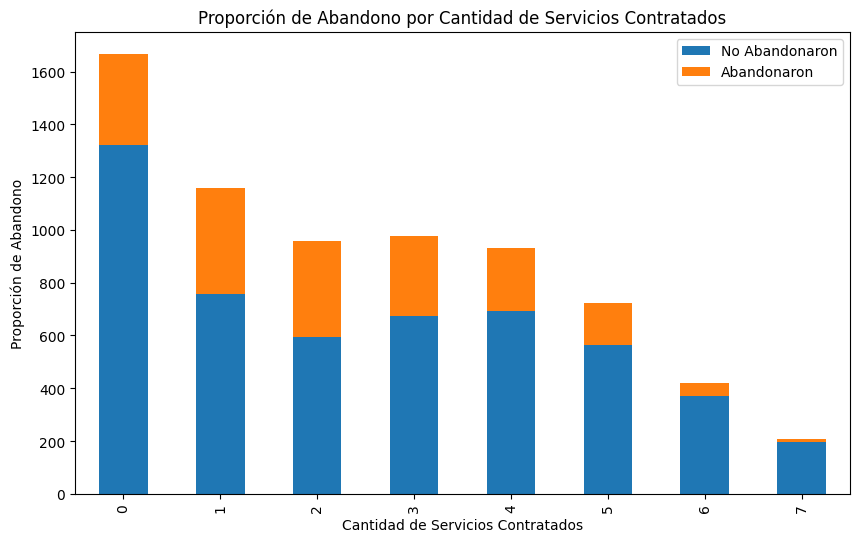

In [156]:
# Gráfico de proporciones apiladas
plt.figure(figsize=(12, 6))
proportions = df.groupby(['Cantidad de Servicios Contratados', 'Abandono']).size().unstack().fillna(0)
proportions['Proporción de Abandono'] = proportions[1] / (proportions[0] + proportions[1])
proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proporción de Abandono por Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios Contratados')
plt.ylabel('Proporción de Abandono')
plt.legend(['No Abandonaron', 'Abandonaron'])
plt.show()

In [160]:
print(df.isnull().sum())

ID Cliente                           0
Abandono                             0
Género                               0
Mayor de 65 años                     0
Tiene Pareja                         0
Tiene Dependientes                   0
Duración del Contrato (meses)        0
Servicio Telefónico                  0
Múltiples Líneas                     0
Servicio de Internet                 0
Seguridad en Línea                   0
Respaldo en Línea                    0
Protección del Dispositivo           0
Soporte Técnico                      0
TV por Cable                         0
Streaming de Películas               0
Tipo de Contrato                     0
Facturación Sin Papel                0
Método de Pago                       0
Costo Mensual                        0
Costo Total                          0
Costo Diario                         0
Rango de Contrato                    0
Cantidad de Servicios Contratados    0
dtype: int64


In [164]:
#exportar el DataFrame a un archivo CSV
df.to_csv('datos_tratados.csv', index=False)

# 📄Informe final

## 1. Introducción
El presente informe tiene como objetivo analizar los datos de clientes de la empresa Telecom X, con especial énfasis en el fenómeno de abandono de clientes (churn). A través de un proceso de limpieza, transformación y análisis exploratorio de los datos, se busca identificar patrones y variables relevantes que influyen en la decisión de los clientes de permanecer o dejar la compañía. Este análisis permitirá a la empresa comprender mejor el comportamiento de sus usuarios y diseñar estrategias efectivas para mejorar la retención y optimizar sus servicios.

## 2. Limpieza y Tratamiento
### Importación

* Se carga el archivo de datos desde una URL en formato JSON a una estructura adecuada para su análisis, en este caso un dataframe.
* Se verifica la información general de los datos revisando su estructura antes de iniciar el proceso de limpieza y transformación.
### Limpiar
1. Conversión de tipos de datos.
* Las columnas categóricas se convirtieron a tipo str, bool y float respectivamente.
* Se reemplazan errores por NaN y luego esos NaN por 0.
2. Se eliminaron filas con valores vacíos en la columna Churn.
3. Se verificaron posibles duplicados en customerID.

### Procesar
1.   Normalización de columnas anidadas: Se usó ```
pd.json_normalize``` para extraer y aplanar las columnas anidadas (customer, phone, internet, account) y se concatenaron al DataFrame principal.
2. Creación de nuevas columnas: Se creó la columna Charges.Diary dividiendo el costo mensual entre 30 y redondeando a dos decimales.
3. Renombrado de columnas: Se cambiaron los nombres de las columnas al español para mayor claridad.
4. Transformación de valores categóricos: Se transformaron los valores "Yes"/"No" y similares a 1 y 0 en varias columnas.
5. Reemplazo de valores en columnas: Se reemplazaron valores específicos en columnas como género, tipo de contrato, método de pago, etc., por versiones abreviadas o en español.
6. Se realiza análisis de correlación para identificar relaciones iniciales entre las variables e identificar qué aspectos están altamente relacionados con la evasión.
## 3. Ánalisis exploratorio de datos


### 3.1 Análisis Descriptivo
* Se realiza análisis descriptivo para obtener una visión general y de contexto del conjunto de datos.
    * Conocer la distribución de las variables (medias, medianas, desviaciones, valores mínimos y máximos).
    * Identificar tendencias, patrones y posibles anomalías en los datos.
    * Comprender la composición demográfica y de servicios de los clientes.
    * Facilitar la detección de problemas de calidad de datos antes de análisis más avanzados.
    * Servir como base para interpretar los resultados y orientar los siguientes pasos del análisis.

Una vez evaluada la información, se detecto lo siguiente:
#### 1. Tasa de abandono
La tasa de abandono promedio es del 26.54%. Esto indica que aproximadamente un cuarto de los clientes deja el servicio.
#### 2. Demografía del cliente
* Género: La mayoría de los clientes son hombres (51.69%).
* Mayor de 65 años: Solo el 48.31% de los clientes son mayores de 65 años, lo que sugiere que la mayoría son más jóvenes.
* Tiene Pareja: El 48.30%  tiene pareja.
* Tiene Dependientes: El 29.96% tiene dependientes.

#### 3. Duración del contrato:
Duración promedio 32.37 meses, con una desviación estándar de 24.56 meses.

#### 4. Servicios:
* Servicio telefónico: El 90.32% tiene servicio telefónico.
* Múltiples líneas: El 42.18% tiene múltiples líneas.
* Servicio de internet: El 90.32% tiene servicio de internet.
* Protección del dispositivo: El 34.39% tiene protección del dispositivo.
* Soporte técnico: El 29.02% tiene soporte técnico.
* TV por cable: El 38.44% tiene TV por cable.
* Streaming de películas: El 38.79% tiene streaming de películas.

#### 5. Tipo de contrato y facturación:
* Tipo de Contrato: La mayoría son mensuales (59.22%).
* Facturación Sin Papel: El 59.22% prefiere la facturación sin papel.
* Método de Pago: El 23.65% prefiere el cheque electrónico.

#### 6. Costos:
* Costo mensual promedio de $64.76
* Costo total promedio es de $2,279.73
* Costo diario promedio es de $2.16

#### 7. Interpretación

* Retención de clientes: La alta tasa de abandono (26.54%) es una preocupación significativa. La empresa debe investigar las razones detrás de este abandono y desarrollar estrategias para mejorar la retención de clientes, como ofrecer mejores servicios al cliente, promociones de fidelización, o mejorar la calidad del servicio.
* Demografía del cliente: La mayoría de los clientes son hombres y no mayores de 65 años. Esto sugiere que la empresa debe enfocarse en segmentos de mercado más jóvenes y masculinos para sus campañas de marketing y desarrollo de productos.
* Servicios Adicionales: La alta adopción de servicios como el servicio telefónico y el servicio de internet indica que estos son servicios clave. Sin embargo, la baja adopción de servicios adicionales como la protección del dispositivo y el soporte técnico sugiere una oportunidad para aumentar los ingresos mediante la promoción de estos servicios.
* Duración del Contrato: La variabilidad en la duración del contrato sugiere que la empresa debe trabajar en la estandarización y la mejora de la experiencia del cliente para asegurar contratos más largos y estables.
* Costos: Los costos mensuales y totales son relativamente bajos, lo que puede ser una ventaja competitiva. Sin embargo, la empresa debe asegurarse de que estos costos sean sostenibles y que no estén afectando la calidad del servicio.

### 3.2 Análisis de Correlación
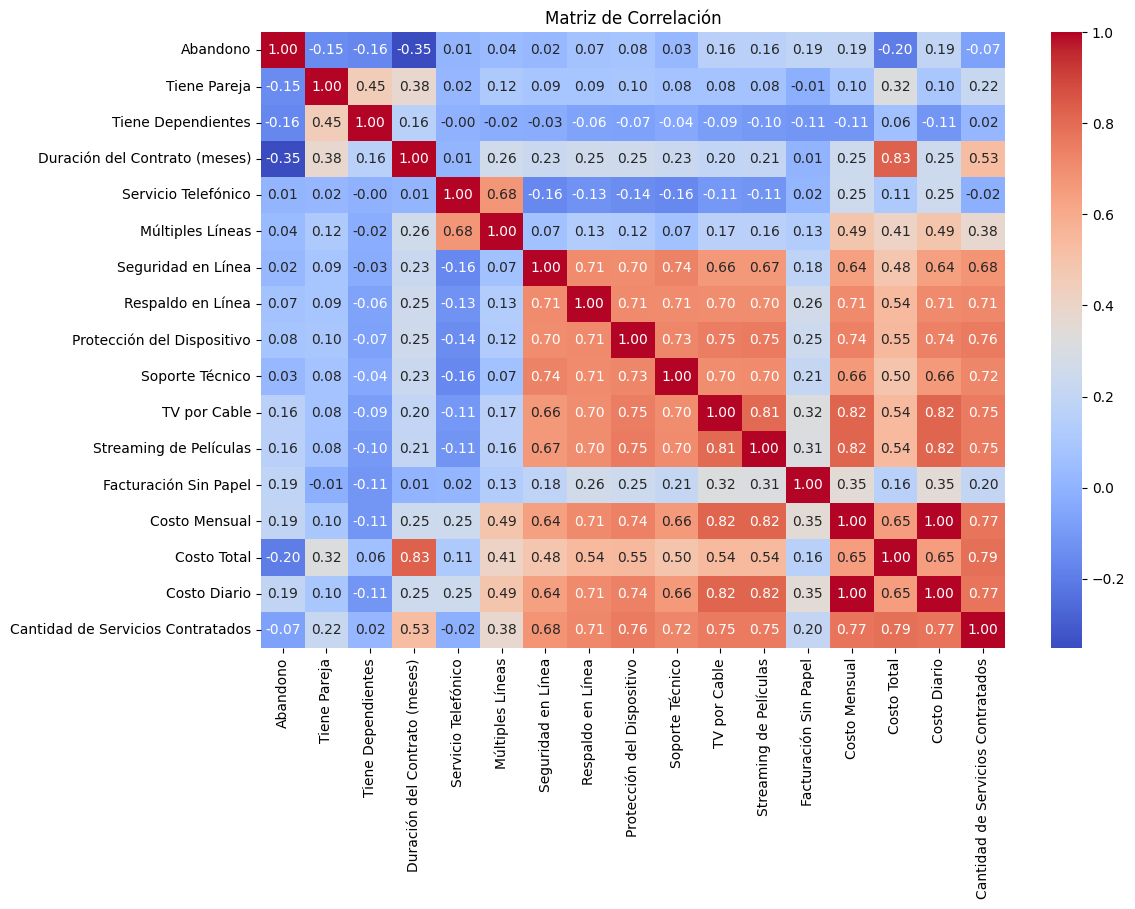
#### Comentarios sobre el mapa de calor de la matriz de correlación
1. 'Abandono' (churn) muestra una correlación negativa moderada con la 'Duración del Contrato (meses)' (-0.35), lo que indica que los clientes con contratos más largos tienden a **abandonar menos**.
2. 'Abandono' también tiene correlaciones negativas con servicios adicionales como 'Seguridad en Línea', 'Soporte Técnico' y 'Protección del Dispositivo', sugiriendo que quienes contratan estos servicios adicionales tienden a permanecer más tiempo, situación que se ve tambien en la correlación de cantidad de servicios contratados
3. Existe una correlación positiva entre 'Abandono' y 'Facturación Sin Papel' (0.19) y 'Costo Mensual' (0.19), lo que podría indicar que quienes pagan más o prefieren facturación digital tienden a abandonar más.
4. Las variables de servicios adicionales (como 'TV por Cable', 'Streaming de Películas', etc.) están fuertemente correlacionadas entre sí, lo que sugiere que los clientes suelen contratar varios servicios adicionales juntos.
5. 'Costo Total' está altamente correlacionado con la 'Duración del Contrato', lo cual es lógico ya que a mayor tiempo de permanencia, mayor gasto acumulado.

En resumen, la retención de clientes parece estar asociada a la duración del contrato y la contratación de servicios adicionales por lo que se analizan en detalle estas variables

### 3.3 Analisis de la distribución de la evación o abandono del servicio
* Se evidencia que aproximadamente el 26.5% de los clientes han abandonado, mientras que el 73.5% permanecen activos. Esta proporción significa que *uno de cada cuatro clientes decide dejar el servicio*

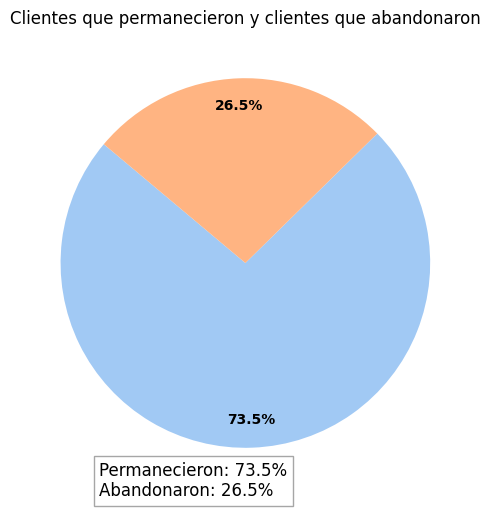

* Según los análisis y gráficos realizados, la variable género no muestra una diferencia significativa en la tasa de abandono entre hombres y mujeres, lo que indica que el género no es un factor determinante para predecir la evasión de clientes en este caso.

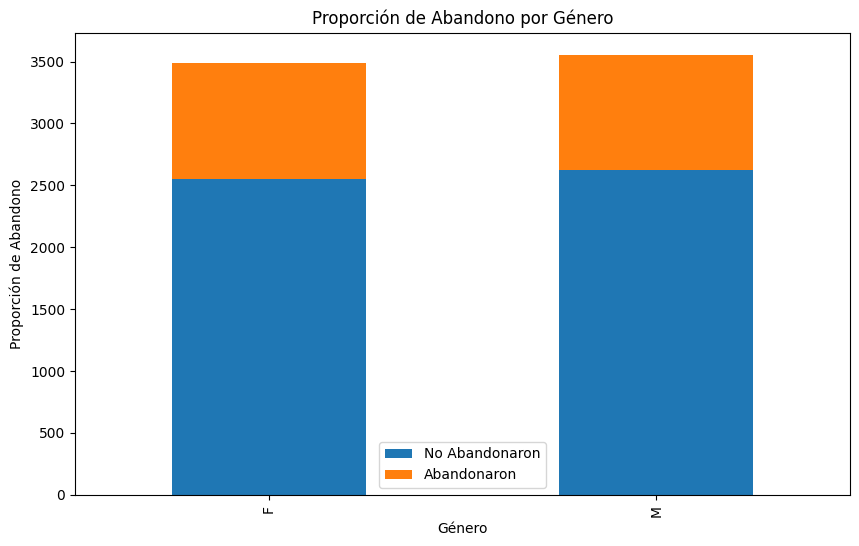

* Al revisar la evación segun el método de pago el análisis, muestra que existen diferencias en la tasa de abandono según la forma en que los clientes pagan. Los gráficos indican que los clientes que utilizan cheque electrónico presentan una tasa de abandono más alta en comparación con otros métodos como tarjeta de crédito automática, transferencia bancaria automática o cheque por correo.
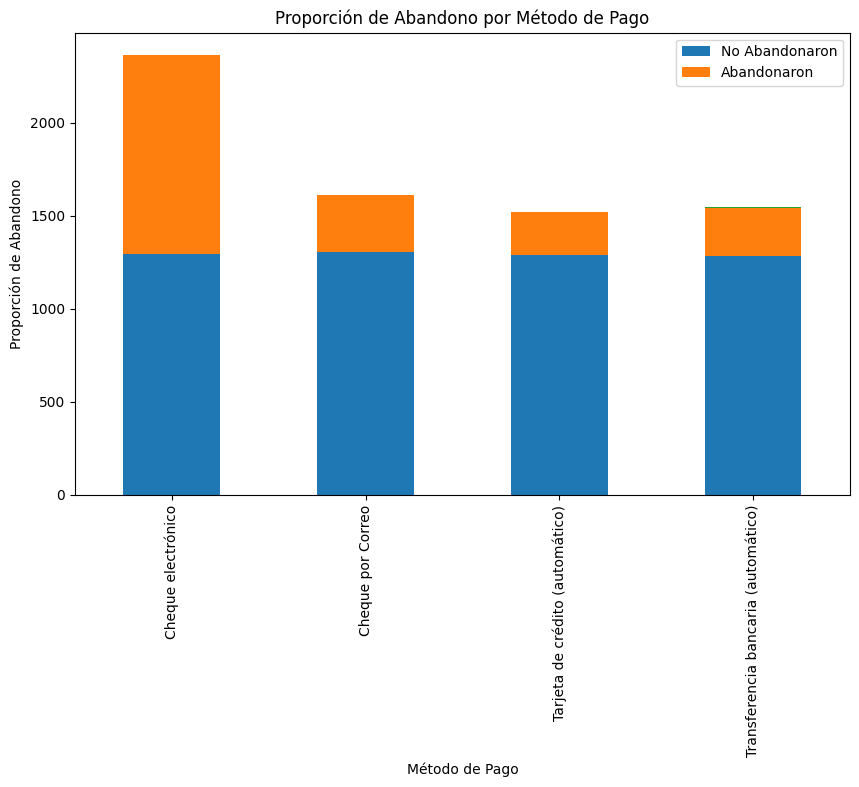
* Al segmentar la tasa de abandono según la duración del contrato, se observa que los clientes con menor antigüedad (especialmente aquellos con menos de 10 meses de contrato) presentan una mayor propensión a abandonar. A medida que aumenta el tiempo de permanencia, la tasa de abandono disminuye considerablemente, lo que sugiere que la *fidelización mejora con el tiempo*.
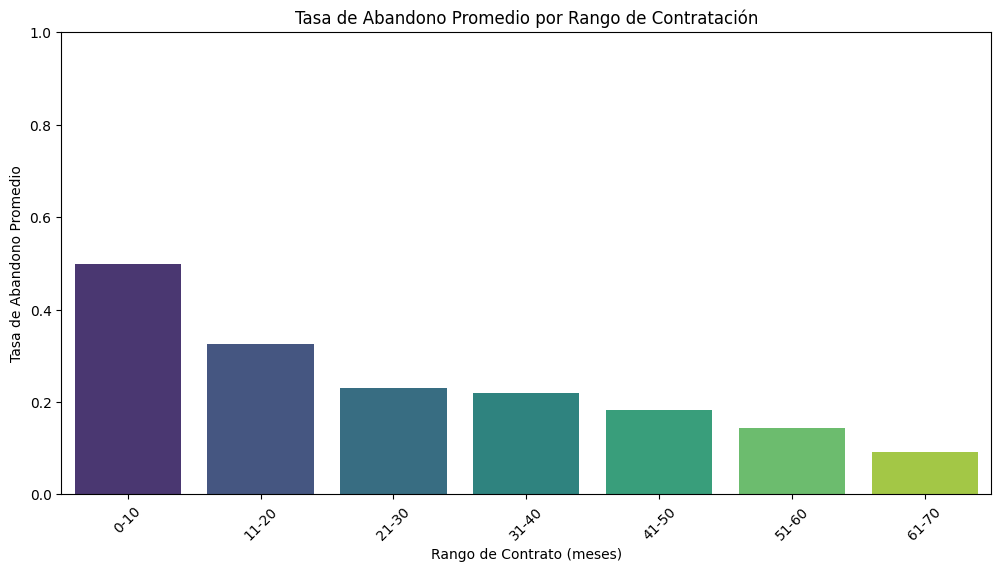
* El servicio de internet también puede estar contribuyendo al abandono, ya que los clientes con fibra óptica presentan la mayor tasa de abandono. Esto puede deberse a expectativas más altas sobre la calidad del servicio, mayor competencia en este segmento o posibles problemas técnicos que generan insatisfacción.
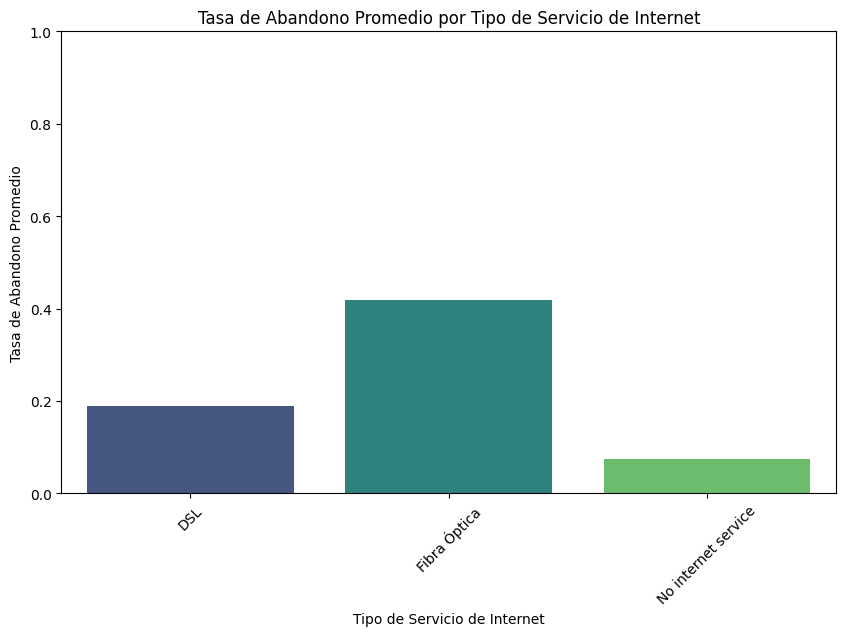
* El tipo de contrato es un factor determinante en la evasión. Los contratos mensuales presentan la tasa de abandono más alta, mientras que los contratos anuales y bianuales muestran tasas significativamente menores. Esto indica que los clientes con compromisos a largo plazo tienden a permanecer más tiempo, posiblemente debido a beneficios o descuentos asociados a estos contratos.
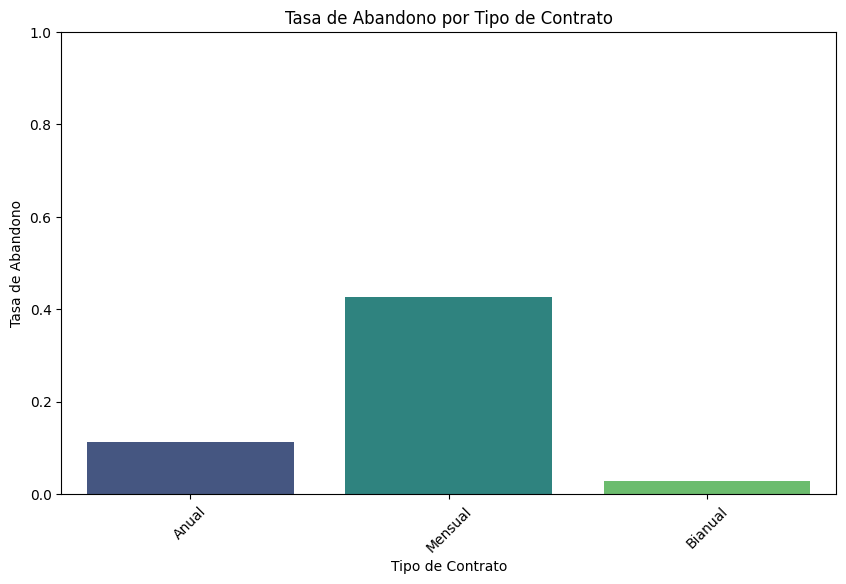
* Por la relación que tiene la evasión con la duración del contrato y el costo total(acumulado) se muestra que los clientes que abandonan tienden a tener una menor duración de contrato y un menor costo total acumulado en comparación con quienes permanecen. La mayoría de los clientes que se van lo hacen en los primeros meses y antes de alcanzar un gasto significativo. Además, se observa una mayor dispersión en el grupo de clientes que permanecen, lo que indica que existen perfiles muy variados entre los clientes fieles, desde quienes gastan poco hasta quienes tienen una larga relación y alto gasto.
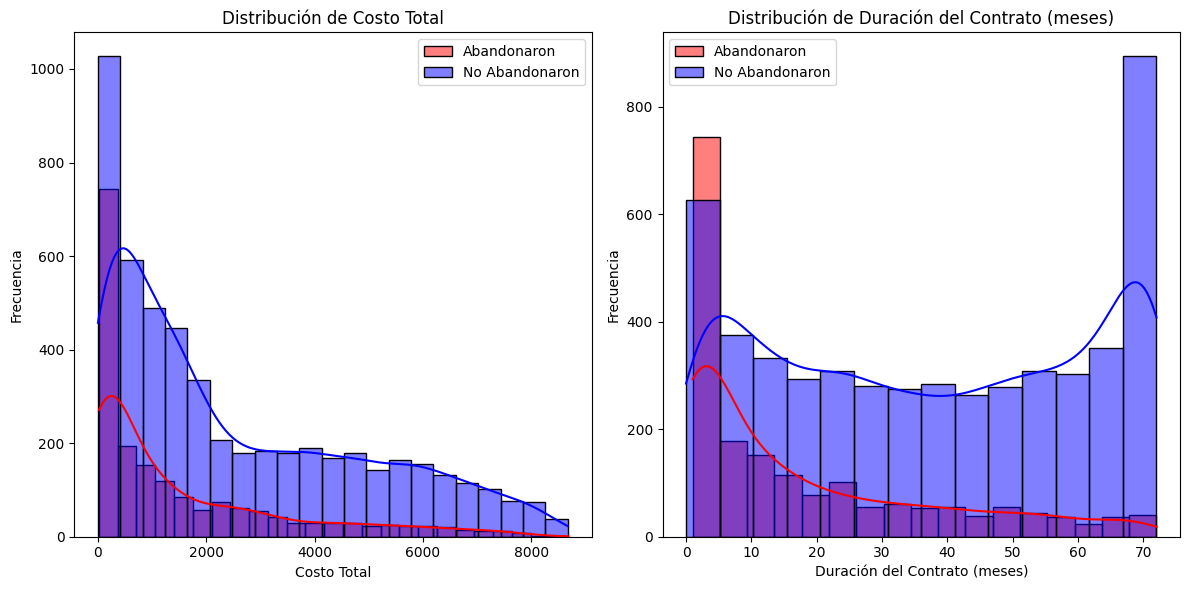
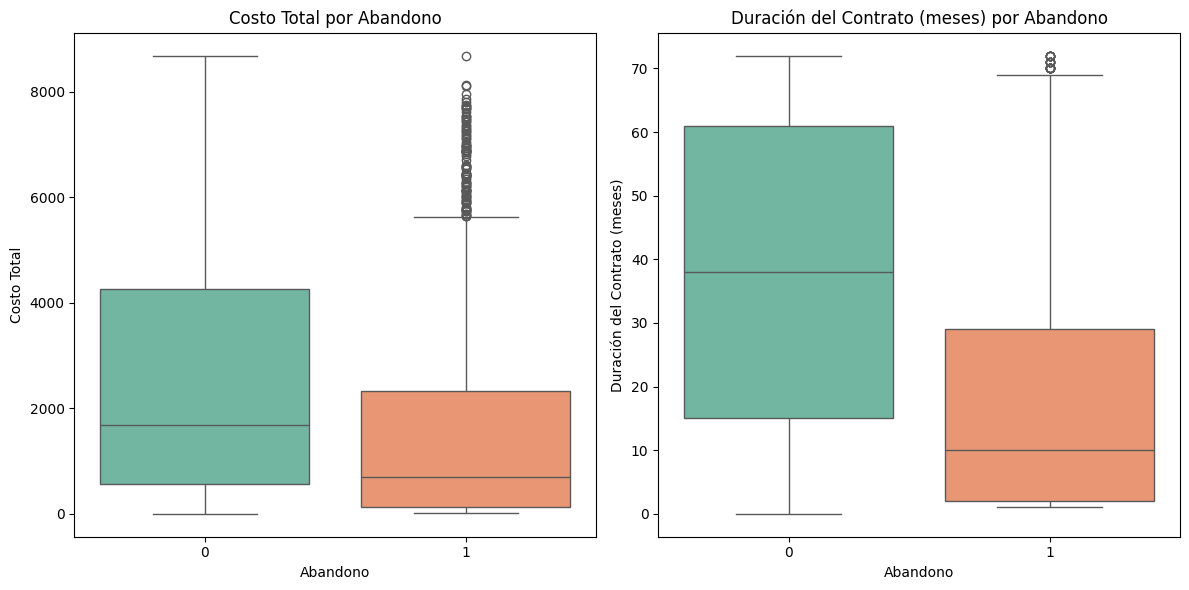


* Siguiendo los comentarios del análisis de correlación que indican que la tasa de abandono puede estar relacionada fuertemente con los servicios contratados. Se puede observar que los clientes que abandonan tienden a tener contratados menos servicios en comparación con los que permanecen. Es decir, a mayor cantidad de servicios contratados, menor es la probabilidad de abandono. Esto sugiere que la diversificación y el “cross-selling” de servicios pueden ser estrategias efectivas para aumentar la retención de clientes, ya que quienes utilizan más servicios están más vinculados a la empresa y son menos propensos a irse.
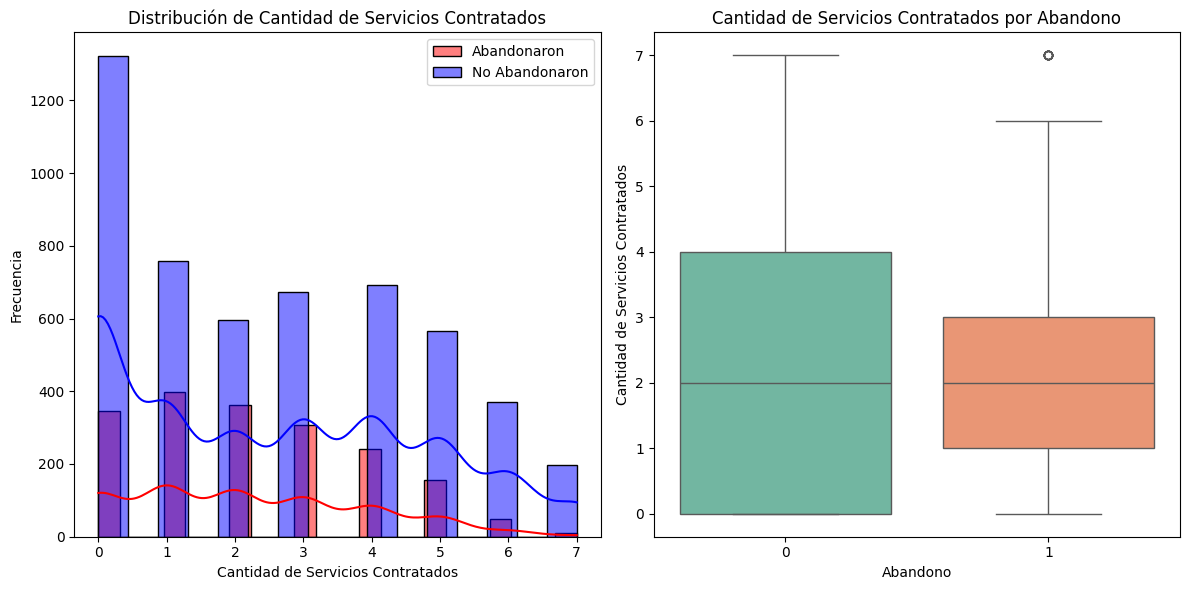
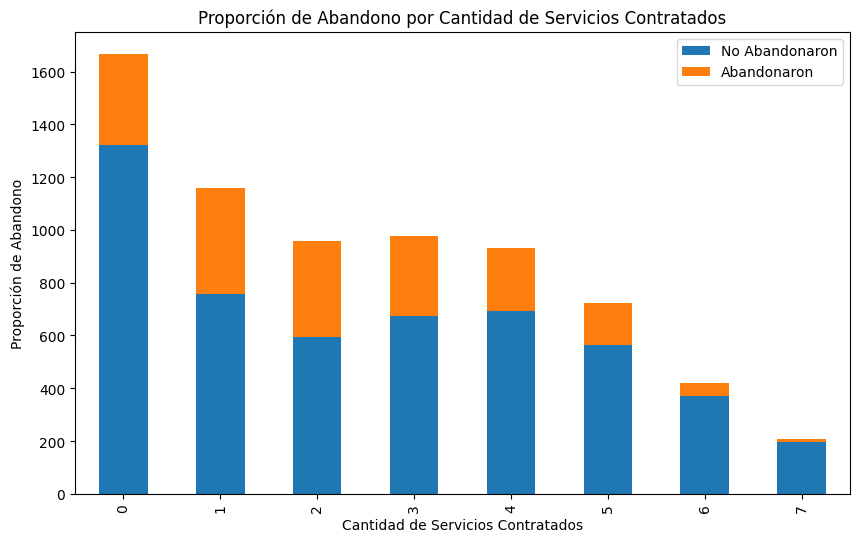
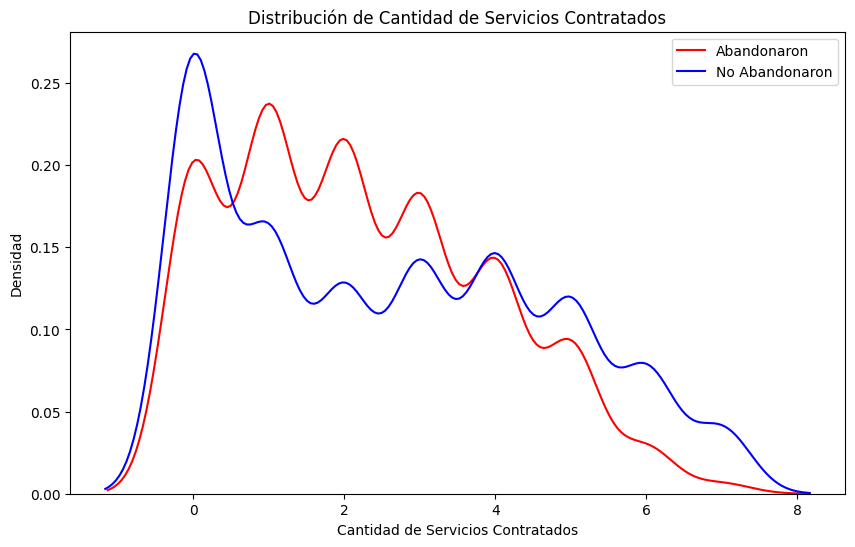

## 4. Conclusiones e Insights

A partir del análisis realizado sobre los datos de clientes de Telecom X, se pueden destacar los siguientes puntos clave:

### 1. Tasa de abandono relevante
- Aproximadamente el **26.5% de los clientes han abandonado** la empresa, lo que representa una proporción significativa y una oportunidad clara de mejora en la retención.

### 2. Variables demográficas
- **Género**: No se observan diferencias significativas en la tasa de abandono entre hombres y mujeres. El género no es un factor determinante para la evasión.
- **Edad y dependientes**: La mayoría de los clientes no son mayores de 65 años y menos del 30% tienen dependientes, lo que sugiere un perfil de cliente relativamente joven y sin cargas familiares.

### 3. Servicios y productos contratados
- **Cantidad de servicios**: Los clientes que contratan más servicios (telefonía, múltiples líneas, protección, soporte, TV, streaming) tienen una **menor probabilidad de abandonar**. El “cross-selling” es una estrategia efectiva para aumentar la retención.
- **Servicio de internet**: Los clientes con **fibra óptica presentan la mayor tasa de abandono**. Esto puede estar relacionado con expectativas más altas, competencia o problemas de calidad. Es fundamental revisar la experiencia de este segmento.
- **Clientes sin internet**: Son los que menos abandonan, posiblemente por menor exposición a la competencia o menor exigencia.

### 4. Contrato y facturación
- **Tipo de contrato**: Los contratos **mensuales** tienen la tasa de abandono más alta, mientras que los contratos anuales y bianuales muestran mayor fidelidad. Incentivar contratos de mayor duración puede reducir la evasión.
- **Duración del contrato**: Los clientes que abandonan suelen tener contratos más cortos y menor gasto acumulado. La fidelización mejora con el tiempo.
- **Método de pago**: El **cheque electrónico** está asociado a una mayor tasa de abandono. Los métodos automáticos (tarjeta o transferencia) favorecen la permanencia.

### 5. Costos
- Los clientes que permanecen tienden a tener un **mayor costo total acumulado** y mayor dispersión en el gasto, lo que indica perfiles variados entre los clientes fieles.

## 5. Recomendaciones estratégicas
- **Fomentar la contratación de múltiples servicios** para aumentar la vinculación del cliente.
- **Revisar y mejorar la calidad del servicio de fibra óptica** y la atención a este segmento.
- **Incentivar contratos de mayor duración** mediante beneficios o descuentos.
- **Promover métodos de pago automáticos** para reducir la fricción y la evasión.
- **Desarrollar estrategias de retención específicas para clientes nuevos**, ya que la mayor parte del abandono ocurre en los primeros meses.

En resumen, la retención de clientes en Telecom X depende principalmente de la cantidad de servicios contratados, el tipo y duración del contrato, el método de pago y la experiencia con el servicio de internet. Abordar estos puntos permitirá reducir la tasa de abandono y mejorar la rentabilidad de la empresa y fortalecer su posición competitiva en el mercado.